In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics , preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression


In [55]:
df = pd.read_csv('ChurnData.csv')
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [56]:
x = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer']]
y = np.asanyarray(df['churn'])

In [57]:
x = preprocessing.StandardScaler().fit_transform(x)

In [58]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=4)


In [59]:
lr = LogisticRegression(C=0.01,solver='liblinear')
lr.fit(x_train,y_train)


LogisticRegression(C=0.01, solver='liblinear')

In [60]:
yhat = lr.predict(x_test)

acc = metrics.jaccard_score(y_test,yhat,pos_label = 0)
acc

np.float64(0.6046511627906976)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  9]
 [ 8 26]]


Confusion matrix, without normalization
[[ 7  9]
 [ 8 26]]


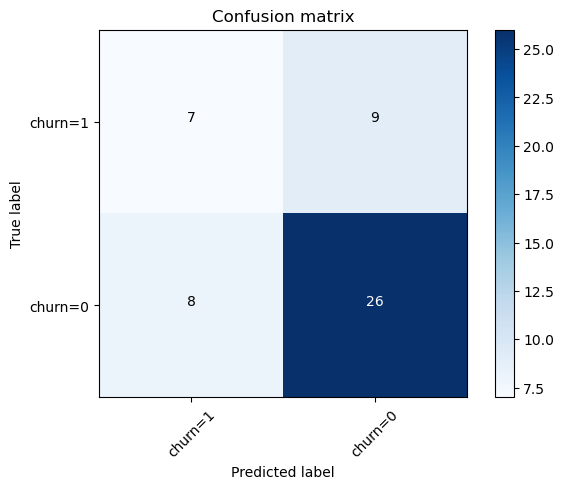

In [64]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.show()